<a href="https://colab.research.google.com/github/MandhikaBGR/LatDataGColab/blob/main/Belajar_AI_bersama_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BAGIAN 1 - Dasar Phyton Data Science

In [23]:
import pandas as pd  # Kita panggil alat "Excel super" (Pandas)

# 1. Kita buat data transaksi mentah (Format Dictionary)
data_warung = {
    'Produk': ['Kopi Hitam', 'Es Teh', 'Latte', 'Kopi Hitam', 'Es Teh'],
    'Harga': [15000, 10000, 25000, 15000, 10000],
    'Jumlah_Terjual': [10, 50, 20, 5, 30]
}

# 2. Kita ubah data mentah jadi Tabel Pintar (DataFrame)
df = pd.DataFrame(data_warung)

# 3. Tampilkan hasilnya
df

,Produk,Harga,Jumlah_Terjual
0,Kopi Hitam,15000,10
1,Es Teh,10000,50
2,Latte,25000,20
3,Kopi Hitam,15000,5
4,Es Teh,10000,30


In [24]:
# Menghitung Total Omzet per baris (Harga x Jumlah)
df['Total_Omzet'] = df['Harga'] * df['Jumlah_Terjual']

# Tampilkan tabel yang sudah update
df

,Produk,Harga,Jumlah_Terjual,Total_Omzet
0,Kopi Hitam,15000,10,150000
1,Es Teh,10000,50,500000
2,Latte,25000,20,500000
3,Kopi Hitam,15000,5,75000
4,Es Teh,10000,30,300000


In [25]:
from sklearn.linear_model import LinearRegression # Kita panggil "Otak" AI sederhana

# 1. Persiapkan Data untuk Belajar (Training)
# X = Data Input (Jumlah Terjual)
# y = Data Target (Total Omzet)
X = df[['Jumlah_Terjual']]
y = df['Total_Omzet']

# 2. Membuat Model (Wadah Otak Kosong)
model_ai = LinearRegression()

# 3. Melatih Model (Training)
# Disini AI mencari pola hubungan antara Jumlah Jual vs Omzet
model_ai.fit(X, y)

# 4. Prediksi Masa Depan
# Kita tanya: "Kalau besok saya jual 75 cup, dapat omzet berapa?"
prediksi_besok = model_ai.predict([[75]])

print(f"Prediksi Omzet untuk 75 cup: Rp {prediksi_besok[0]:,.0f}")

Prediksi Omzet untuk 75 cup: Rp 743,750


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


BAGIAN 2 - DATA SCRAPING

In [26]:
import pandas as pd
import requests
from io import StringIO

# GANTI TARGET: Kita ke Wikipedia Inggris yang strukturnya lebih "bersahabat"
url = 'https://en.wikipedia.org/wiki/Provinces_of_Indonesia'

header_palsu = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

r = requests.get(url, headers=header_palsu)
html_data = StringIO(r.text)

# JURUS KUNCI: match='Capital'
# Artinya: "Eh Python, cari tabel yang di dalamnya ADA kata 'Capital' (Ibukota)"
# Ini akan menyaring tabel menu sampah dan fokus ke tabel data.
semua_tabel = pd.read_html(html_data, match='Capital')

print(f"Total tabel ditemukan: {len(semua_tabel)}")

# Ambil tabel pertama yang cocok
df_provinsi = semua_tabel[0]

# Tampilkan hasilnya
display(df_provinsi.head())

Total tabel ditemukan: 6


Code            Coat of arms     Name[2][3]                        City  \
     # ISO[6] ID- Coat of arms        English      Indonesian     Capital   
0   11         AC          NaN           Aceh            Aceh  Banda Aceh   
1   12         SU          NaN  North Sumatra  Sumatera Utara       Medan   
2   13         SB          NaN   West Sumatra  Sumatera Barat      Padang   
3   14         RI          NaN           Riau            Riau   Pekanbaru   
4   15         JA          NaN          Jambi           Jambi       Jambi   

              Geographical unit Area (km2) Population (mid 2024) [4]  \
      Largest Geographical unit Area (km2) Population (mid 2024) [4]   
0  Banda Aceh           Sumatra      56835                   5554800   
1       Medan           Sumatra      72461                  15588500   
2      Padang           Sumatra      42120                   5836200   
3   Pekanbaru           Sumatra      89936                   6728100   
4       Jambi           Sumatra      49027                   3724300   

  Density per km2 (mid 2024)[5] 2nd Level       
  Density per km2 (mid 2024)[5]    Cities Reg.  
0                            98         5   18  
1                           215         8   25  
2                           139         7   12  
3                            75         2   10  
4                            76         2    9

In [27]:
# 1. "Gepengkan" Header yang bertumpuk
# Kita gabungkan teks header atas dan bawah dengan spasi
df_provinsi.columns = [' '.join(col).strip() for col in df_provinsi.columns.values]

# 2. Cek sebentar hasilnya (Biar yakin headernya sudah rapi)
print("Header baru:", df_provinsi.columns)

# 3. Sekarang baru simpan ke Excel
nama_file = 'Data_Provinsi_Indonesia_Hasil_Scraping.xlsx'
df_provinsi.to_excel(nama_file, index=False)

print(f"\nSUKSES! File '{nama_file}' berhasil dibuat.")

Header baru: Index(['Code #', 'Code ISO[6] ID-', 'Coat of arms Coat of arms',
       'Name[2][3] English', 'Name[2][3] Indonesian', 'City Capital',
       'City Largest', 'Geographical unit Geographical unit',
       'Area (km2) Area (km2)',
       'Population (mid 2024) [4] Population (mid 2024) [4]',
       'Density per km2 (mid 2024)[5] Density per km2 (mid 2024)[5]',
       '2nd Level Cities', '2nd Level Reg.'],
      dtype='object')

SUKSES! File 'Data_Provinsi_Indonesia_Hasil_Scraping.xlsx' berhasil dibuat.


BAGIAN 3 - DATA CLEANING

In [28]:
import pandas as pd

# 1. Buka kembali file Excel hasil scraping tadi
df = pd.read_excel('Data_Provinsi_Indonesia_Hasil_Scraping.xlsx')

# 2. Lihat "isi perut" data (Tipe Data)
print("=== INFO DATA MENTAH ===")
df.info()

# 3. Tampilkan 5 baris pertama untuk kita intip
display(df.head())

=== INFO DATA MENTAH ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Code #                                                       38 non-null     int64  
 1   Code ISO[6] ID-                                              38 non-null     object 
 2   Coat of arms Coat of arms                                    0 non-null      float64
 3   Name[2][3] English                                           38 non-null     object 
 4   Name[2][3] Indonesian                                        38 non-null     object 
 5   City Capital                                                 38 non-null     object 
 6   City Largest                                                 38 non-null     object 
 7   Geographical unit Geographical unit                      

,Code #,Code ISO[6] ID-,Coat of arms Coat of arms,Name[2][3] English,Name[2][3] Indonesian,City Capital,City Largest,Geographical unit Geographical unit,Area (km2) Area (km2),Population (mid 2024) [4] Population (mid 2024) [4],Density per km2 (mid 2024)[5] Density per km2 (mid 2024)[5],2nd Level Cities,2nd Level Reg.
0,11,AC,NaN,Aceh,Aceh,Banda Aceh,Banda Aceh,Sumatra,56835,5554800,98,5,18
1,12,SU,NaN,North Sumatra,Sumatera Utara,Medan,Medan,Sumatra,72461,15588500,215,8,25
2,13,SB,NaN,West Sumatra,Sumatera Barat,Padang,Padang,Sumatra,42120,5836200,139,7,12
3,14,RI,NaN,Riau,Riau,Pekanbaru,Pekanbaru,Sumatra,89936,6728100,75,2,10
4,15,JA,NaN,Jambi,Jambi,Jambi,Jambi,Sumatra,49027,3724300,76,2,9


In [29]:
# 1. MEMILIH KOLOM PENTING (Slicing)
# Kita pakai iloc (Index Location) untuk mengambil kolom berdasarkan nomor urutnya.
# Berdasarkan hasil info() Anda tadi:
# Kolom 4 = Name Indonesian
# Kolom 5 = City Capital
# Kolom 9 = Population
# Kolom 8 = Area
df_clean = df.iloc[:, [4, 5, 9, 8]].copy()

# 2. GANTI NAMA (Renaming)
# Kita beri nama baru yang simpel
df_clean.columns = ['Provinsi', 'Ibukota', 'Populasi', 'Luas_km2']

# 3. FITUR BARU (Feature Engineering)
# Mari kita buat data baru dari data yang ada.
# Kepadatan Penduduk = Populasi dibagi Luas Wilayah
# Ini angka penting untuk melihat potensi pasar yang "padat".
df_clean['Kepadatan'] = df_clean['Populasi'] / df_clean['Luas_km2']

# 4. URUTKAN DATA
# Kita urutkan dari populasi terbanyak (High Potential Market)
df_clean = df_clean.sort_values('Populasi', ascending=False).reset_index(drop=True)

# Tampilkan Hasil Akhir
print("=== DATA BERSIH & SIAP ANALISIS ===")
display(df_clean.head(10)) # Tampilkan Top 10 Provinsi

=== DATA BERSIH & SIAP ANALISIS ===


,Provinsi,Ibukota,Populasi,Luas_km2,Kepadatan
0,Jawa Barat,Bandung,50345200,37045,1359.028209
1,Jawa Timur,Surabaya,41814500,48037,870.464434
2,Jawa Tengah,Semarang,37892300,34337,1103.541369
3,Sumatera Utara,Medan,15588500,72461,215.129518
4,Banten,Serang,12431400,9353,1329.135037
5,Daerah Khusus Ibukota Jakarta,Central Jakarta (de facto)[a],10684900,661,16164.750378
6,Sulawesi Selatan,Makassar,9463400,45331,208.762216
7,Lampung,Bandar Lampung,9419600,33570,280.595770
8,Sumatera Selatan,Palembang,8837300,86772,101.845065
9,Riau,Pekanbaru,6728100,89936,74.809865


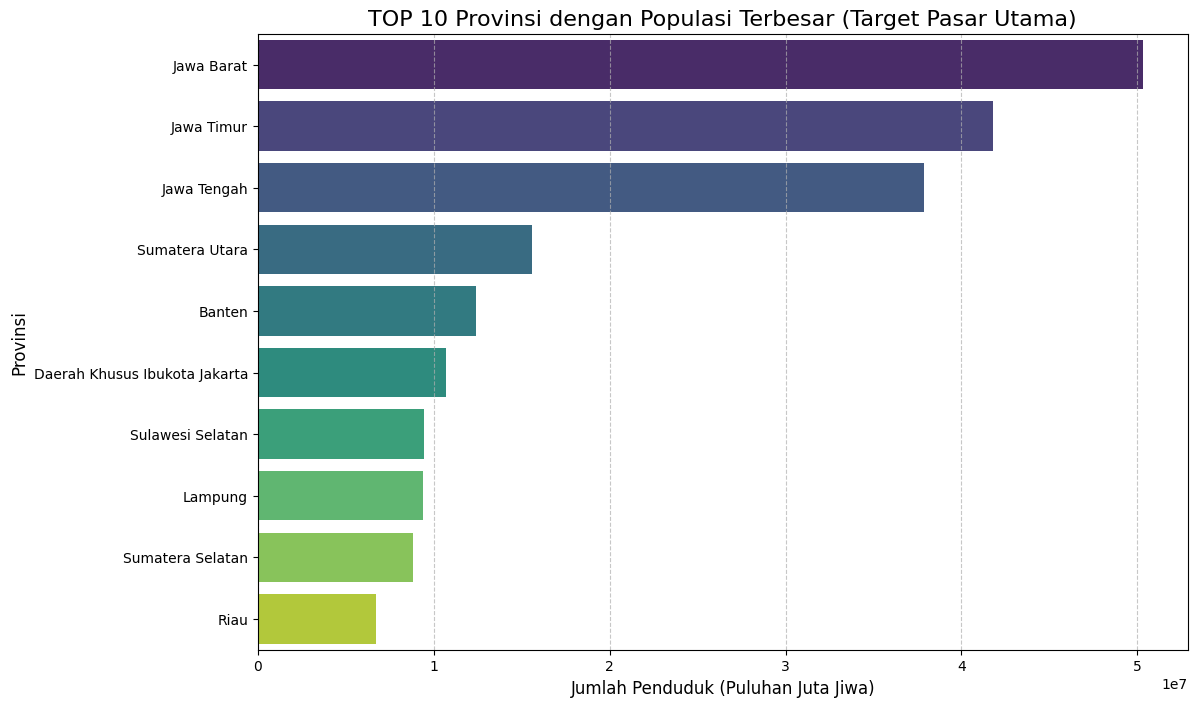

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# PERBAIKAN:
# Kita tambahkan parameter 'hue' yang isinya sama dengan 'y' (Provinsi)
# Ini memberi tahu Python: "Bedakan warnanya berdasarkan nama Provinsi ya."
sns.barplot(
    data=df_clean.head(10),
    x='Populasi',
    y='Provinsi',
    hue='Provinsi',     # <--- Tambahan Baru (Wajib di versi baru)
    legend=False,       # <--- Biar tidak muncul keterangan warna dobel
    palette='viridis'
)

plt.title('TOP 10 Provinsi dengan Populasi Terbesar (Target Pasar Utama)', fontsize=16)
plt.xlabel('Jumlah Penduduk (Puluhan Juta Jiwa)', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

NATURAL LANGUAGE PROCESSING (NLP)

In [31]:
# 1. Install library (karena belum ada bawaan di Google Colab)
!pip install textblob

# 2. Download kamus bahasa (Corpora)
# AI butuh kamus untuk tahu mana kata sifat, kata benda, dll.
from textblob import TextBlob
import nltk
nltk.download('punkt')

print("SIAP! Alat bedah teks sudah terpasang.")

SIAP! Alat bedah teks sudah terpasang.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
from textblob import TextBlob

# Skenario: Kita punya 2 review pelanggan
review_bagus = "This product is amazing and very useful. I love it!"
review_jelek = "The service is terrible and slow. I am very angry."

# Masukkan ke dalam otak AI
analisis_1 = TextBlob(review_bagus)
analisis_2 = TextBlob(review_jelek)

# Tampilkan Hasil Bedah Otak
print("=== REVIEW 1 (Bagus) ===")
print(f"Kalimat: {review_bagus}")
print(f"Skor Emosi: {analisis_1.sentiment}\n")

print("=== REVIEW 2 (Jelek) ===")
print(f"Kalimat: {review_jelek}")
print(f"Skor Emosi: {analisis_2.sentiment}")

=== REVIEW 1 (Bagus) ===
Kalimat: This product is amazing and very useful. I love it!
Skor Emosi: Sentiment(polarity=0.5383333333333334, subjectivity=0.5)

=== REVIEW 2 (Jelek) ===
Kalimat: The service is terrible and slow. I am very angry.
Skor Emosi: Sentiment(polarity=-0.65, subjectivity=0.7999999999999999)


In [33]:
import nltk
from textblob.classifiers import NaiveBayesClassifier

# --- PERBAIKAN: Download Kamus Versi Terbaru ---
# Kita download kedua versinya biar aman
nltk.download('punkt')
nltk.download('punkt_tab')

# --- KODE TRAINING (Yang tadi error) ---
train_data = [
    ('Barang ini bagus sekali', 'pos'),
    ('Saya sangat suka produknya', 'pos'),
    ('Pengiriman cepat dan aman', 'pos'),
    ('Respon penjual ramah mantap', 'pos'),
    ('Kualitas oke punya', 'pos'),
    ('Barang rusak parah', 'neg'),
    ('Sangat kecewa belanja disini', 'neg'),
    ('Pengiriman lama banget', 'neg'),
    ('Penipu jangan beli', 'neg'),
    ('Barang tidak sesuai gambar', 'neg')
]

print("\nSedang melatih otak AI...")
model_indo = NaiveBayesClassifier(train_data)
print("SUKSES! AI sudah bisa Bahasa Indonesia.")

# --- TES ULANG ---
kalimat_baru = "Wah barangnya sampai dengan aman, mantap gan!"
hasil = model_indo.classify(kalimat_baru)
distribusi = model_indo.prob_classify(kalimat_baru)

print(f"\nKalimat: '{kalimat_baru}'")
print(f"Hasil Analisis: {hasil.upper()} (Positif/Negatif)")
print(f"Tingkat Keyakinan Positif: {distribusi.prob('pos'):.2f}")


Sedang melatih otak AI...
SUKSES! AI sudah bisa Bahasa Indonesia.

Kalimat: 'Wah barangnya sampai dengan aman, mantap gan!'
Hasil Analisis: POS (Positif/Negatif)
Tingkat Keyakinan Positif: 0.90


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
import pandas as pd

# 1. CERITANYA: Ini data kiriman klien (Excel berisi 5 ulasan acak)
data_klien = {
    'Nama_User': ['Budi', 'Siti', 'Joko', 'Ani', 'Dewi'],
    'Komentar': [
        'Barang rusak parah, nyesel beli',
        'Suka banget, pengiriman cepat',
        'Biasa aja sih, tapi oke lah',
        'Penipu! Gambar beda sama asli',
        'Kualitas oke punya, mantap gan'
    ]
}
df_reviews = pd.DataFrame(data_klien)

# 2. DEFINISI FUNGSI AI (Otak yang akan dipanggil berulang-ulang)
def cek_emosi(teks):
    # Kita pakai model_indo yang sudah Anda latih tadi
    hasil = model_indo.classify(teks)
    return hasil

# 3. EKSEKUSI MASSAL (Batch Processing)
# Kita suruh Pandas nanya ke AI untuk setiap baris
df_reviews['Sentimen_AI'] = df_reviews['Komentar'].apply(cek_emosi)

# 4. FILTERING (Mencari Uang di Tumpukan Data)
# Klien cuma mau lihat yang komplain (NEG) untuk ditangani CS
laporan_komplain = df_reviews[df_reviews['Sentimen_AI'] == 'neg']

print("=== SEMUA DATA ===")
display(df_reviews)

print("\n=== LAPORAN KHUSUS KOMPLAIN (PRIORITAS CS) ===")
display(laporan_komplain)

=== SEMUA DATA ===


,Nama_User,Komentar,Sentimen_AI
0,Budi,"Barang rusak parah, nyesel beli",neg
1,Siti,"Suka banget, pengiriman cepat",neg
2,Joko,"Biasa aja sih, tapi oke lah",pos
3,Ani,Penipu! Gambar beda sama asli,neg
4,Dewi,"Kualitas oke punya, mantap gan",pos



=== LAPORAN KHUSUS KOMPLAIN (PRIORITAS CS) ===


,Nama_User,Komentar,Sentimen_AI
0,Budi,"Barang rusak parah, nyesel beli",neg
1,Siti,"Suka banget, pengiriman cepat",neg
3,Ani,Penipu! Gambar beda sama asli,neg


SAVING THE CODES

In [35]:
import pickle

# 1. MENYIMPAN MODEL (Exporting)
# Kita bungkus variabel 'model_indo' ke dalam file bernama 'otak_ai_v1.pkl'
# 'wb' artinya Write Binary (Tulis dalam format mesin)
nama_file_model = 'otak_ai_v1.pkl'
with open(nama_file_model, 'wb') as file:
    pickle.dump(model_indo, file)

print(f"BERHASIL! Model telah disimpan sebagai '{nama_file_model}'.")
print("Silakan cek folder di kiri untuk mendownload file ini.")

BERHASIL! Model telah disimpan sebagai 'otak_ai_v1.pkl'.
Silakan cek folder di kiri untuk mendownload file ini.


In [36]:
# 2. MEMBUKA MODEL (Importing)
# Anggap kita tidak punya data training lagi. Kita cuma punya file .pkl tadi.
# 'rb' artinya Read Binary
with open('otak_ai_v1.pkl', 'rb') as file:
    otak_load = pickle.load(file)

# Langsung pakai untuk prediksi!
test_kalimat = "Pelayanan toko ini sangat mengecewakan, respon lambat."
hasil = otak_load.classify(test_kalimat)

print(f"Kalimat: {test_kalimat}")
print(f"Hasil Prediksi dari File: {hasil.upper()}")

Kalimat: Pelayanan toko ini sangat mengecewakan, respon lambat.
Hasil Prediksi dari File: POS
